![表紙](https://www.oreilly.co.jp/books/images/picture978-4-87311-907-6.gif)

このノートブックはオライリー・ジャパンより発行の書籍[『セキュリティエンジニアのための機械学習』](https://www.oreilly.co.jp/books/9784873119076/)のサンプルコードです。コードの解説等は書籍をご参照ください。なお、このコードを動作させた結果について、著者およびオライリー・ジャパンは一切の責任を負いません。

The data set used in this code was created in the following paper:

Catak FO, Yazı AF, Elezaj O, Ahmed J. 2020. Deep learning based Sequential model for malware analysis using Windows exe API Calls. PeerJ Computer Science 6:e285 https://doi.org/10.7717/peerj-cs.285

In [ ]:
!wget https://raw.githubusercontent.com/ocatak/malware_api_class/master/mal-api-2019.zip
!wget https://raw.githubusercontent.com/ocatak/malware_api_class/master/labels.csv

--2021-09-05 01:57:46--  https://raw.githubusercontent.com/ocatak/malware_api_class/master/mal-api-2019.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12373026 (12M) [application/zip]
Saving to: ‘mal-api-2019.zip’

mal-api-2019.zip    100%[===================>]  11.80M  68.5MB/s    in 0.2s    

2021-09-05 01:57:46 (68.5 MB/s) - ‘mal-api-2019.zip’ saved [12373026/12373026]

--2021-09-05 01:57:46--  https://raw.githubusercontent.com/ocatak/malware_api_class/master/labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62583

In [ ]:
!unzip -q mal-api-2019.zip

In [ ]:
!head ./all_analysis_data.txt

ldrloaddll ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetproced

In [ ]:
with open("all_analysis_data.txt") as f:
    content = f.readlines()

# 改行文字の削除
content = [x.strip() for x in content]

In [ ]:
import pandas as pd

data = pd.DataFrame()
data['feature'] = content

In [ ]:
data['feature'].head()

0    ldrloaddll ldrgetprocedureaddress ldrloaddll l...
1    getsystemtimeasfiletime ntallocatevirtualmemor...
2    ldrgetdllhandle ldrgetprocedureaddress getsyst...
3    ldrloaddll ldrgetprocedureaddress ldrloaddll l...
4    ldrloaddll ldrgetprocedureaddress ldrgetproced...
Name: feature, dtype: object

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_words = 800
max_len = 100

X = data['feature']

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)

# API名をシーケンス番号に変換
X = tokenizer.texts_to_sequences(X)

# 記録されているAPI呼び出しの総数は検体ごとに異なるため、
# 最大100回で大きさを統一する。
# truncating='post'を指定して、100回よりも多く　APIが記録されている場合は
# 後方101回目以降をカットする。
X = sequence.pad_sequences(X, maxlen=max_len, truncating='post')

In [ ]:
print(tokenizer.word_index)

{'getasynckeystate': 1, 'ntdelayexecution': 2, 'ntclose': 3, 'process32nextw': 4, 'ntreadfile': 5, 'findfirstfileexw': 6, 'ntallocatevirtualmemory': 7, 'ntcreatefile': 8, 'copyfilea': 9, 'ntquerydirectoryfile': 10, 'getkeystate': 11, 'exception': 12, 'deviceiocontrol': 13, 'ldrgetdllhandle': 14, 'getsystemmetrics': 15, 'readprocessmemory': 16, 'ntwritefile': 17, 'ldrgetprocedureaddress': 18, 'ntfreevirtualmemory': 19, 'findwindowa': 20, 'getfileattributesw': 21, 'setfilepointer': 22, 'findresourcea': 23, 'deletefilew': 24, 'regclosekey': 25, 'gethostbyname': 26, 'regopenkeyexw': 27, 'ntopenfile': 28, 'seterrormode': 29, 'ntopenprocess': 30, 'shellexecuteexw': 31, 'regqueryvalueexw': 32, 'getcursorpos': 33, 'getforegroundwindow': 34, 'getfilesize': 35, 'openscmanagera': 36, 'outputdebugstringa': 37, 'setfileattributesw': 38, 'socket': 39, 'ldrloaddll': 40, 'closesocket': 41, 'regsetvalueexa': 42, 'ntprotectvirtualmemory': 43, 'regqueryvalueexa': 44, 'connect': 45, 'ntopenkeyex': 46, 're

In [ ]:
data['feature'][0]

'ldrloaddll ldrgetprocedureaddress ldrloaddll ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetprocedureaddress ldrgetproce

In [ ]:
X[0]

array([40, 18, 40, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 40, 18, 18, 18, 18,
       40, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18],
      dtype=int32)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

with open("labels.csv") as f:
    label_data = f.readlines()

# 改行文字の削除
label_data = [x.strip() for x in label_data]

data["labels"] = label_data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


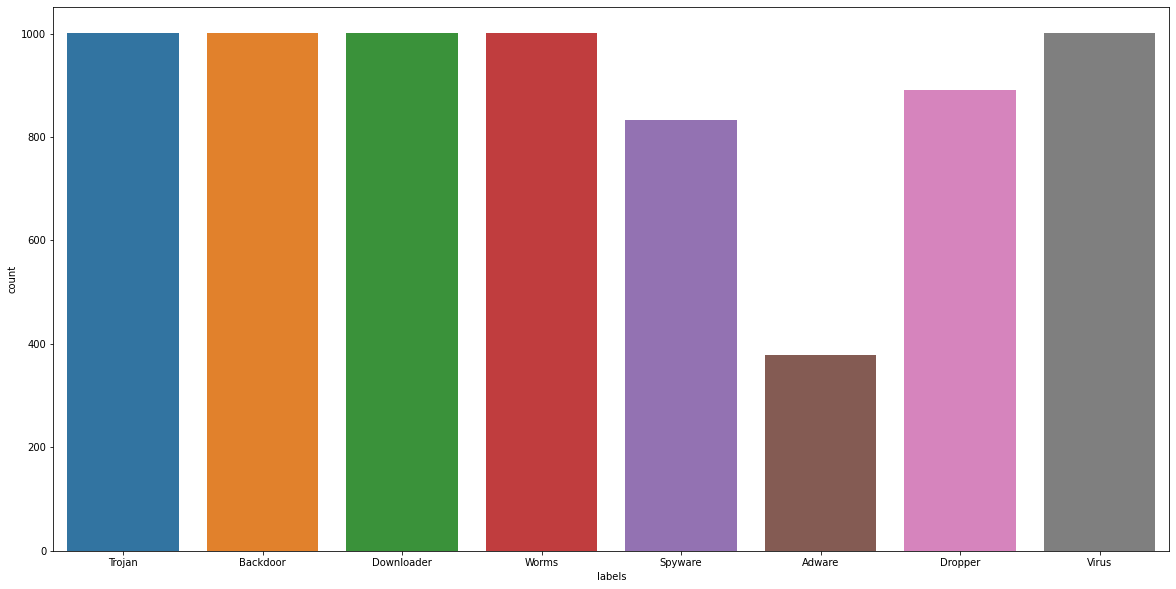

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.countplot(data["labels"])

In [ ]:
# マルウェアの種類として"Virus"というラベルが設定されているものを検出対象に
y = data["labels"].apply(lambda x: 1 if x == "Virus" else 0)

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
7102    1
7103    1
7104    1
7105    1
7106    1
Name: labels, Length: 7107, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

def malware_model():
    model = Sequential()
    model.add(Embedding(max_words, 300, input_length=max_len))
    model.add(LSTM(32, return_sequences=True))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = malware_model()
print(model.summary())
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',metrics=['accuracy']
    )

history = model.fit(
    X_train,
    y_train, 
    batch_size=64, 
    epochs=10, 
    validation_data=(X_test, y_test), 
    verbose=1
    )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          240000    
_________________________________________________________________
lstm (LSTM)                  (None, 100, 32)           42624     
_________________________________________________________________
dense (Dense)                (None, 100, 1)            33        
Total params: 282,657
Trainable params: 282,657
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
95/95 [==============================] - 11s 93ms/step - loss: 0.4039 - accuracy: 0.8535 - val_loss: 0.3596 - val_accuracy: 0.8759
Epoch 2/10
95/95 [==============================] - 8s 88ms/step - loss: 0.3367 - accuracy: 0.8782 - val_loss: 0.3194 - val_accuracy: 0.8904
Epoch 3/10
95/95 [==============================] - 8s 88ms/step - loss: 0.2888 - accuracy: 

In [ ]:
!pip install optuna

     |████████████████████████████████| 302 kB 23.9 MB/s 
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 208 kB 59.4 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 141 kB 73.5 MB/s 
     |████████████████████████████████| 111 kB 73.6 MB/s 
     |████████████████████████████████| 49 kB 6.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=72637945154496f539e36e03cf24c4226532038c018e2bb91efa77cf7d94b5f6
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import optuna


class Objective:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __call__(self, trial):
        # セッションのクリア
        clear_session()

        # モデルの作成と、パラメータ探索の設定
        model = Sequential()
        model.add(Embedding(max_words, 300, input_length=max_len))
        model.add(LSTM(32, return_sequences=True))
        model.add(Dense(1, activation='sigmoid'))

        optimizer = Adam(
            learning_rate=trial.suggest_loguniform("learning_rate", 1e-5, 1e-1),
            beta_1=trial.suggest_uniform("beta_1", 0.0, 1.0),
            beta_2=trial.suggest_uniform("beta_2", 0.0, 1.0)
            )
        model.compile(
            loss='binary_crossentropy', 
            optimizer=optimizer, 
            metrics=['accuracy']
            )
        model.fit(
            self.X, 
            self.y, 
            batch_size=256, 
            epochs=10, 
            validation_data=(X_test, y_test)
            )

        return model.evaluate(X_test, y_test, verbose=0)[1]

objective = Objective(X_train, y_train)
study = optuna.create_study()
study.optimize(objective, timeout=1200)
print('params:', study.best_params)

[I 2021-09-05 02:03:04,539] A new study created in memory with name: no-name-0955a9ae-79d4-41fc-9c89-806ac72ff9c3


Epoch 1/10
24/24 [==============================] - 9s 285ms/step - loss: 0.3917 - accuracy: 0.8505 - val_loss: 0.3463 - val_accuracy: 0.8834
Epoch 2/10
24/24 [==============================] - 6s 269ms/step - loss: 0.2593 - accuracy: 0.9149 - val_loss: 0.2865 - val_accuracy: 0.9074
Epoch 3/10
24/24 [==============================] - 6s 267ms/step - loss: 0.2483 - accuracy: 0.9181 - val_loss: 0.2682 - val_accuracy: 0.9134
Epoch 4/10
24/24 [==============================] - 6s 270ms/step - loss: 0.2436 - accuracy: 0.9203 - val_loss: 0.2662 - val_accuracy: 0.9169
Epoch 5/10
24/24 [==============================] - 6s 271ms/step - loss: 0.2398 - accuracy: 0.9212 - val_loss: 0.2777 - val_accuracy: 0.9148
Epoch 6/10
24/24 [==============================] - 7s 272ms/step - loss: 0.2331 - accuracy: 0.9238 - val_loss: 0.2754 - val_accuracy: 0.9171
Epoch 7/10
24/24 [==============================] - 7s 273ms/step - loss: 0.2426 - accuracy: 0.9202 - val_loss: 0.2666 - val_accuracy: 0.9169
Epoch 

[I 2021-09-05 02:04:28,984] Trial 0 finished with value: 0.926551103591919 and parameters: {'learning_rate': 0.04143747957391515, 'beta_1': 0.47030445139324306, 'beta_2': 0.5627975040053443}. Best is trial 0 with value: 0.926551103591919.


Epoch 1/10
24/24 [==============================] - 9s 287ms/step - loss: 0.4175 - accuracy: 0.8484 - val_loss: 0.3612 - val_accuracy: 0.8745
Epoch 2/10
24/24 [==============================] - 6s 268ms/step - loss: 0.3208 - accuracy: 0.8883 - val_loss: 0.3051 - val_accuracy: 0.9057
Epoch 3/10
24/24 [==============================] - 6s 271ms/step - loss: 0.2611 - accuracy: 0.9178 - val_loss: 0.2929 - val_accuracy: 0.9092
Epoch 4/10
24/24 [==============================] - 6s 267ms/step - loss: 0.2769 - accuracy: 0.9099 - val_loss: 0.2904 - val_accuracy: 0.9110
Epoch 5/10
24/24 [==============================] - 6s 267ms/step - loss: 0.2488 - accuracy: 0.9206 - val_loss: 0.2803 - val_accuracy: 0.9121
Epoch 6/10
24/24 [==============================] - 6s 267ms/step - loss: 0.2626 - accuracy: 0.9134 - val_loss: 0.2931 - val_accuracy: 0.9089
Epoch 7/10
24/24 [==============================] - 6s 268ms/step - loss: 0.2432 - accuracy: 0.9207 - val_loss: 0.2963 - val_accuracy: 0.8990
Epoch 

[I 2021-09-05 02:05:53,634] Trial 1 finished with value: 0.9133177399635315 and parameters: {'learning_rate': 0.003194067373356506, 'beta_1': 0.25085000796021095, 'beta_2': 0.006058826451849075}. Best is trial 1 with value: 0.9133177399635315.


Epoch 1/10
24/24 [==============================] - 9s 290ms/step - loss: 0.4129 - accuracy: 0.8395 - val_loss: 0.3661 - val_accuracy: 0.8724
Epoch 2/10
24/24 [==============================] - 6s 267ms/step - loss: 0.3347 - accuracy: 0.8778 - val_loss: 0.3087 - val_accuracy: 0.9016
Epoch 3/10
24/24 [==============================] - 6s 265ms/step - loss: 0.2720 - accuracy: 0.9123 - val_loss: 0.2950 - val_accuracy: 0.9098
Epoch 4/10
24/24 [==============================] - 6s 265ms/step - loss: 0.2933 - accuracy: 0.8998 - val_loss: 0.3365 - val_accuracy: 0.8874
Epoch 5/10
24/24 [==============================] - 6s 266ms/step - loss: 0.2702 - accuracy: 0.9101 - val_loss: 0.2787 - val_accuracy: 0.9087
Epoch 6/10
24/24 [==============================] - 6s 266ms/step - loss: 0.2366 - accuracy: 0.9222 - val_loss: 0.2606 - val_accuracy: 0.9180
Epoch 7/10
24/24 [==============================] - 6s 267ms/step - loss: 0.2275 - accuracy: 0.9239 - val_loss: 0.2627 - val_accuracy: 0.9172
Epoch 

[I 2021-09-05 02:07:00,694] Trial 2 finished with value: 0.9171977639198303 and parameters: {'learning_rate': 0.004348131733559839, 'beta_1': 0.6008498114511227, 'beta_2': 0.01996985438960297}. Best is trial 1 with value: 0.9133177399635315.


Epoch 1/10
24/24 [==============================] - 9s 286ms/step - loss: 0.3800 - accuracy: 0.8337 - val_loss: 0.3745 - val_accuracy: 0.8246
Epoch 2/10
24/24 [==============================] - 6s 267ms/step - loss: 0.3085 - accuracy: 0.8771 - val_loss: 0.3078 - val_accuracy: 0.8996
Epoch 3/10
24/24 [==============================] - 6s 266ms/step - loss: 0.2745 - accuracy: 0.9038 - val_loss: 0.2982 - val_accuracy: 0.9017
Epoch 4/10
24/24 [==============================] - 6s 269ms/step - loss: 0.2713 - accuracy: 0.9086 - val_loss: 0.3101 - val_accuracy: 0.9005
Epoch 5/10
24/24 [==============================] - 6s 268ms/step - loss: 0.2724 - accuracy: 0.9073 - val_loss: 0.2994 - val_accuracy: 0.8993
Epoch 6/10
24/24 [==============================] - 6s 268ms/step - loss: 0.2664 - accuracy: 0.9087 - val_loss: 0.3026 - val_accuracy: 0.9051
Epoch 7/10
24/24 [==============================] - 6s 269ms/step - loss: 0.2661 - accuracy: 0.9077 - val_loss: 0.3100 - val_accuracy: 0.8961
Epoch 

[I 2021-09-05 02:08:07,893] Trial 3 finished with value: 0.9013495445251465 and parameters: {'learning_rate': 0.061448614636105126, 'beta_1': 0.7554226353686933, 'beta_2': 0.6440446166357178}. Best is trial 3 with value: 0.9013495445251465.


Epoch 1/10
24/24 [==============================] - 9s 284ms/step - loss: 0.5396 - accuracy: 0.8295 - val_loss: 0.3831 - val_accuracy: 0.8699
Epoch 2/10
24/24 [==============================] - 6s 266ms/step - loss: 0.3749 - accuracy: 0.8628 - val_loss: 0.3672 - val_accuracy: 0.8734
Epoch 3/10
24/24 [==============================] - 6s 266ms/step - loss: 0.3559 - accuracy: 0.8666 - val_loss: 0.3562 - val_accuracy: 0.8758
Epoch 4/10
24/24 [==============================] - 6s 266ms/step - loss: 0.3346 - accuracy: 0.8706 - val_loss: 0.3422 - val_accuracy: 0.8779
Epoch 5/10
24/24 [==============================] - 6s 265ms/step - loss: 0.3113 - accuracy: 0.8754 - val_loss: 0.3254 - val_accuracy: 0.8810
Epoch 6/10
24/24 [==============================] - 6s 265ms/step - loss: 0.2919 - accuracy: 0.8873 - val_loss: 0.3160 - val_accuracy: 0.8931
Epoch 7/10
24/24 [==============================] - 6s 265ms/step - loss: 0.2943 - accuracy: 0.8922 - val_loss: 0.3022 - val_accuracy: 0.9017
Epoch 

[I 2021-09-05 02:09:14,937] Trial 4 finished with value: 0.910740315914154 and parameters: {'learning_rate': 0.0006912117248225394, 'beta_1': 0.5038517200973434, 'beta_2': 0.3986649960963312}. Best is trial 3 with value: 0.9013495445251465.


Epoch 1/10
24/24 [==============================] - 9s 284ms/step - loss: 0.6723 - accuracy: 0.6796 - val_loss: 0.6325 - val_accuracy: 0.8668
Epoch 2/10
24/24 [==============================] - 6s 264ms/step - loss: 0.5986 - accuracy: 0.8595 - val_loss: 0.5589 - val_accuracy: 0.8685
Epoch 3/10
24/24 [==============================] - 6s 266ms/step - loss: 0.5247 - accuracy: 0.8595 - val_loss: 0.4870 - val_accuracy: 0.8694
Epoch 4/10
24/24 [==============================] - 6s 264ms/step - loss: 0.4565 - accuracy: 0.8597 - val_loss: 0.4222 - val_accuracy: 0.8693
Epoch 5/10
24/24 [==============================] - 6s 265ms/step - loss: 0.4030 - accuracy: 0.8605 - val_loss: 0.3838 - val_accuracy: 0.8701
Epoch 6/10
24/24 [==============================] - 6s 264ms/step - loss: 0.3839 - accuracy: 0.8612 - val_loss: 0.3777 - val_accuracy: 0.8706
Epoch 7/10
24/24 [==============================] - 6s 265ms/step - loss: 0.3770 - accuracy: 0.8633 - val_loss: 0.3741 - val_accuracy: 0.8712
Epoch 

[I 2021-09-05 02:10:39,258] Trial 5 finished with value: 0.8739362359046936 and parameters: {'learning_rate': 0.00010362932866676226, 'beta_1': 0.8463339825016832, 'beta_2': 0.35209674776701927}. Best is trial 5 with value: 0.8739362359046936.


Epoch 1/10
24/24 [==============================] - 9s 302ms/step - loss: 0.3859 - accuracy: 0.8578 - val_loss: 0.3005 - val_accuracy: 0.9082
Epoch 2/10
24/24 [==============================] - 6s 266ms/step - loss: 0.2777 - accuracy: 0.9115 - val_loss: 0.2840 - val_accuracy: 0.9106
Epoch 3/10
24/24 [==============================] - 6s 268ms/step - loss: 0.2734 - accuracy: 0.9112 - val_loss: 0.2883 - val_accuracy: 0.9120
Epoch 4/10
24/24 [==============================] - 6s 267ms/step - loss: 0.2539 - accuracy: 0.9174 - val_loss: 0.2773 - val_accuracy: 0.9111
Epoch 5/10
24/24 [==============================] - 6s 267ms/step - loss: 0.2412 - accuracy: 0.9207 - val_loss: 0.2693 - val_accuracy: 0.9151
Epoch 6/10
24/24 [==============================] - 6s 270ms/step - loss: 0.2301 - accuracy: 0.9252 - val_loss: 0.2457 - val_accuracy: 0.9176
Epoch 7/10
24/24 [==============================] - 6s 271ms/step - loss: 0.2197 - accuracy: 0.9267 - val_loss: 0.2508 - val_accuracy: 0.9199
Epoch 

[I 2021-09-05 02:11:46,904] Trial 6 finished with value: 0.9282005429267883 and parameters: {'learning_rate': 0.009564658414850147, 'beta_1': 0.3348682688062702, 'beta_2': 0.12370242184331093}. Best is trial 5 with value: 0.8739362359046936.


Epoch 1/10
24/24 [==============================] - 9s 292ms/step - loss: 0.3985 - accuracy: 0.8404 - val_loss: 0.3509 - val_accuracy: 0.8749
Epoch 2/10
24/24 [==============================] - 7s 272ms/step - loss: 0.3004 - accuracy: 0.8906 - val_loss: 0.3125 - val_accuracy: 0.8979
Epoch 3/10
24/24 [==============================] - 7s 273ms/step - loss: 0.2691 - accuracy: 0.9062 - val_loss: 0.2905 - val_accuracy: 0.9074
Epoch 4/10
24/24 [==============================] - 7s 273ms/step - loss: 0.2607 - accuracy: 0.9119 - val_loss: 0.3036 - val_accuracy: 0.8966
Epoch 5/10
24/24 [==============================] - 7s 273ms/step - loss: 0.2592 - accuracy: 0.9137 - val_loss: 0.2982 - val_accuracy: 0.8988
Epoch 6/10
24/24 [==============================] - 7s 272ms/step - loss: 0.2581 - accuracy: 0.9103 - val_loss: 0.3003 - val_accuracy: 0.9021
Epoch 7/10
24/24 [==============================] - 7s 272ms/step - loss: 0.2579 - accuracy: 0.9078 - val_loss: 0.2984 - val_accuracy: 0.9091
Epoch 

[I 2021-09-05 02:13:11,337] Trial 7 finished with value: 0.9045361280441284 and parameters: {'learning_rate': 0.029643954808260965, 'beta_1': 0.8173591520427366, 'beta_2': 0.4297963592865536}. Best is trial 5 with value: 0.8739362359046936.


Epoch 1/10
24/24 [==============================] - 9s 291ms/step - loss: 0.4553 - accuracy: 0.8532 - val_loss: 0.3714 - val_accuracy: 0.8728
Epoch 2/10
24/24 [==============================] - 6s 269ms/step - loss: 0.3580 - accuracy: 0.8670 - val_loss: 0.3615 - val_accuracy: 0.8748
Epoch 3/10
24/24 [==============================] - 6s 270ms/step - loss: 0.3372 - accuracy: 0.8742 - val_loss: 0.3434 - val_accuracy: 0.8803
Epoch 4/10
24/24 [==============================] - 7s 272ms/step - loss: 0.3208 - accuracy: 0.8815 - val_loss: 0.3171 - val_accuracy: 0.8909
Epoch 5/10
24/24 [==============================] - 7s 271ms/step - loss: 0.2908 - accuracy: 0.8978 - val_loss: 0.3050 - val_accuracy: 0.9032
Epoch 6/10
24/24 [==============================] - 6s 271ms/step - loss: 0.2717 - accuracy: 0.9122 - val_loss: 0.2919 - val_accuracy: 0.9078
Epoch 7/10
24/24 [==============================] - 6s 270ms/step - loss: 0.2670 - accuracy: 0.9131 - val_loss: 0.2972 - val_accuracy: 0.9092
Epoch 

[I 2021-09-05 02:14:35,745] Trial 8 finished with value: 0.9099718928337097 and parameters: {'learning_rate': 0.0010267802200782904, 'beta_1': 0.08643119344896022, 'beta_2': 0.9366849332074556}. Best is trial 5 with value: 0.8739362359046936.


Epoch 1/10
24/24 [==============================] - 9s 290ms/step - loss: 0.3724 - accuracy: 0.8621 - val_loss: 0.2888 - val_accuracy: 0.9118
Epoch 2/10
24/24 [==============================] - 6s 271ms/step - loss: 0.2773 - accuracy: 0.9109 - val_loss: 0.3111 - val_accuracy: 0.9046
Epoch 3/10
24/24 [==============================] - 6s 267ms/step - loss: 0.2621 - accuracy: 0.9166 - val_loss: 0.2792 - val_accuracy: 0.9153
Epoch 4/10
24/24 [==============================] - 6s 267ms/step - loss: 0.2523 - accuracy: 0.9181 - val_loss: 0.2778 - val_accuracy: 0.9139
Epoch 5/10
24/24 [==============================] - 6s 268ms/step - loss: 0.2336 - accuracy: 0.9230 - val_loss: 0.2644 - val_accuracy: 0.9170
Epoch 6/10
24/24 [==============================] - 6s 270ms/step - loss: 0.2309 - accuracy: 0.9231 - val_loss: 0.2545 - val_accuracy: 0.9185
Epoch 7/10
24/24 [==============================] - 6s 268ms/step - loss: 0.2272 - accuracy: 0.9245 - val_loss: 0.2413 - val_accuracy: 0.9195
Epoch 

[I 2021-09-05 02:16:00,146] Trial 9 finished with value: 0.9359137415885925 and parameters: {'learning_rate': 0.01665994011949338, 'beta_1': 0.2585011599833257, 'beta_2': 0.366690238710342}. Best is trial 5 with value: 0.8739362359046936.


Epoch 1/10
24/24 [==============================] - 9s 289ms/step - loss: 0.6894 - accuracy: 0.6552 - val_loss: 0.6827 - val_accuracy: 0.7796
Epoch 2/10
24/24 [==============================] - 6s 268ms/step - loss: 0.6760 - accuracy: 0.8101 - val_loss: 0.6695 - val_accuracy: 0.8337
Epoch 3/10
24/24 [==============================] - 6s 270ms/step - loss: 0.6629 - accuracy: 0.8335 - val_loss: 0.6564 - val_accuracy: 0.8364
Epoch 4/10
24/24 [==============================] - 6s 268ms/step - loss: 0.6498 - accuracy: 0.8414 - val_loss: 0.6434 - val_accuracy: 0.8650
Epoch 5/10
24/24 [==============================] - 6s 268ms/step - loss: 0.6369 - accuracy: 0.8604 - val_loss: 0.6305 - val_accuracy: 0.8686
Epoch 6/10
24/24 [==============================] - 6s 268ms/step - loss: 0.6240 - accuracy: 0.8614 - val_loss: 0.6176 - val_accuracy: 0.8700
Epoch 7/10
24/24 [==============================] - 6s 270ms/step - loss: 0.6112 - accuracy: 0.8611 - val_loss: 0.6046 - val_accuracy: 0.8699
Epoch 

[I 2021-09-05 02:17:25,020] Trial 10 finished with value: 0.8695970177650452 and parameters: {'learning_rate': 2.712255690465616e-05, 'beta_1': 0.9586728437131489, 'beta_2': 0.7890963124615102}. Best is trial 10 with value: 0.8695970177650452.


Epoch 1/10
24/24 [==============================] - 9s 287ms/step - loss: 0.7031 - accuracy: 0.2673 - val_loss: 0.6967 - val_accuracy: 0.3167
Epoch 2/10
24/24 [==============================] - 6s 268ms/step - loss: 0.6911 - accuracy: 0.5608 - val_loss: 0.6848 - val_accuracy: 0.8285
Epoch 3/10
24/24 [==============================] - 6s 269ms/step - loss: 0.6795 - accuracy: 0.8365 - val_loss: 0.6732 - val_accuracy: 0.8604
Epoch 4/10
24/24 [==============================] - 6s 269ms/step - loss: 0.6679 - accuracy: 0.8528 - val_loss: 0.6618 - val_accuracy: 0.8689
Epoch 5/10
24/24 [==============================] - 6s 269ms/step - loss: 0.6565 - accuracy: 0.8584 - val_loss: 0.6507 - val_accuracy: 0.8708
Epoch 6/10
24/24 [==============================] - 6s 269ms/step - loss: 0.6456 - accuracy: 0.8599 - val_loss: 0.6399 - val_accuracy: 0.8707
Epoch 7/10
24/24 [==============================] - 6s 268ms/step - loss: 0.6349 - accuracy: 0.8597 - val_loss: 0.6293 - val_accuracy: 0.8707
Epoch 

[I 2021-09-05 02:18:32,574] Trial 11 finished with value: 0.8702155947685242 and parameters: {'learning_rate': 2.223241451648451e-05, 'beta_1': 0.991533626708146, 'beta_2': 0.8279796830374879}. Best is trial 10 with value: 0.8695970177650452.


Epoch 1/10
24/24 [==============================] - 9s 290ms/step - loss: 0.6900 - accuracy: 0.6861 - val_loss: 0.6876 - val_accuracy: 0.7609
Epoch 2/10
24/24 [==============================] - 6s 267ms/step - loss: 0.6853 - accuracy: 0.7877 - val_loss: 0.6829 - val_accuracy: 0.8094
Epoch 3/10
24/24 [==============================] - 6s 269ms/step - loss: 0.6806 - accuracy: 0.8238 - val_loss: 0.6782 - val_accuracy: 0.8395
Epoch 4/10
24/24 [==============================] - 6s 268ms/step - loss: 0.6759 - accuracy: 0.8448 - val_loss: 0.6735 - val_accuracy: 0.8574
Epoch 5/10
24/24 [==============================] - 6s 268ms/step - loss: 0.6712 - accuracy: 0.8517 - val_loss: 0.6688 - val_accuracy: 0.8623
Epoch 6/10
24/24 [==============================] - 6s 269ms/step - loss: 0.6665 - accuracy: 0.8544 - val_loss: 0.6641 - val_accuracy: 0.8643
Epoch 7/10
24/24 [==============================] - 6s 271ms/step - loss: 0.6618 - accuracy: 0.8556 - val_loss: 0.6593 - val_accuracy: 0.8654
Epoch 

[I 2021-09-05 02:19:40,636] Trial 12 finished with value: 0.8673288822174072 and parameters: {'learning_rate': 1.0773667240794226e-05, 'beta_1': 0.9679052234133259, 'beta_2': 0.9055300993903302}. Best is trial 12 with value: 0.8673288822174072.


Epoch 1/10
24/24 [==============================] - 9s 289ms/step - loss: 0.6936 - accuracy: 0.4605 - val_loss: 0.6904 - val_accuracy: 0.7024
Epoch 2/10
24/24 [==============================] - 6s 271ms/step - loss: 0.6872 - accuracy: 0.7499 - val_loss: 0.6839 - val_accuracy: 0.7680
Epoch 3/10
24/24 [==============================] - 6s 271ms/step - loss: 0.6807 - accuracy: 0.7883 - val_loss: 0.6775 - val_accuracy: 0.7962
Epoch 4/10
24/24 [==============================] - 6s 270ms/step - loss: 0.6742 - accuracy: 0.8058 - val_loss: 0.6711 - val_accuracy: 0.8119
Epoch 5/10
24/24 [==============================] - 6s 270ms/step - loss: 0.6677 - accuracy: 0.8300 - val_loss: 0.6647 - val_accuracy: 0.8447
Epoch 6/10
24/24 [==============================] - 6s 269ms/step - loss: 0.6615 - accuracy: 0.8434 - val_loss: 0.6585 - val_accuracy: 0.8550
Epoch 7/10
24/24 [==============================] - 6s 270ms/step - loss: 0.6552 - accuracy: 0.8487 - val_loss: 0.6522 - val_accuracy: 0.8586
Epoch 

[I 2021-09-05 02:20:48,526] Trial 13 finished with value: 0.8643206357955933 and parameters: {'learning_rate': 1.0519327775663233e-05, 'beta_1': 0.9935900031074145, 'beta_2': 0.7507761404519995}. Best is trial 13 with value: 0.8643206357955933.


Epoch 1/10
24/24 [==============================] - 9s 289ms/step - loss: 0.6771 - accuracy: 0.7470 - val_loss: 0.6743 - val_accuracy: 0.7832
Epoch 2/10
24/24 [==============================] - 6s 269ms/step - loss: 0.6715 - accuracy: 0.7881 - val_loss: 0.6686 - val_accuracy: 0.8061
Epoch 3/10
24/24 [==============================] - 6s 268ms/step - loss: 0.6658 - accuracy: 0.8047 - val_loss: 0.6629 - val_accuracy: 0.8181
Epoch 4/10
24/24 [==============================] - 6s 269ms/step - loss: 0.6600 - accuracy: 0.8133 - val_loss: 0.6571 - val_accuracy: 0.8265
Epoch 5/10
24/24 [==============================] - 6s 270ms/step - loss: 0.6542 - accuracy: 0.8219 - val_loss: 0.6512 - val_accuracy: 0.8396
Epoch 6/10
24/24 [==============================] - 6s 269ms/step - loss: 0.6482 - accuracy: 0.8337 - val_loss: 0.6451 - val_accuracy: 0.8477
Epoch 7/10
24/24 [==============================] - 6s 269ms/step - loss: 0.6421 - accuracy: 0.8478 - val_loss: 0.6390 - val_accuracy: 0.8643
Epoch 

[I 2021-09-05 02:21:56,165] Trial 14 finished with value: 0.8684254884719849 and parameters: {'learning_rate': 1.1159632465540973e-05, 'beta_1': 0.6858469703001665, 'beta_2': 0.9626024899510808}. Best is trial 13 with value: 0.8643206357955933.


Epoch 1/10
24/24 [==============================] - 9s 310ms/step - loss: 0.6731 - accuracy: 0.7933 - val_loss: 0.6515 - val_accuracy: 0.8616
Epoch 2/10
24/24 [==============================] - 7s 272ms/step - loss: 0.6322 - accuracy: 0.8579 - val_loss: 0.6100 - val_accuracy: 0.8696
Epoch 3/10
24/24 [==============================] - 6s 269ms/step - loss: 0.5894 - accuracy: 0.8594 - val_loss: 0.5657 - val_accuracy: 0.8700
Epoch 4/10
24/24 [==============================] - 7s 272ms/step - loss: 0.5434 - accuracy: 0.8592 - val_loss: 0.5190 - val_accuracy: 0.8700
Epoch 5/10
24/24 [==============================] - 6s 270ms/step - loss: 0.4965 - accuracy: 0.8593 - val_loss: 0.4719 - val_accuracy: 0.8704
Epoch 6/10
24/24 [==============================] - 6s 270ms/step - loss: 0.4523 - accuracy: 0.8604 - val_loss: 0.4288 - val_accuracy: 0.8701
Epoch 7/10
24/24 [==============================] - 6s 271ms/step - loss: 0.4153 - accuracy: 0.8606 - val_loss: 0.3966 - val_accuracy: 0.8703
Epoch 

[I 2021-09-05 02:23:04,797] Trial 15 finished with value: 0.870993435382843 and parameters: {'learning_rate': 8.626759528791025e-05, 'beta_1': 0.8985997059917195, 'beta_2': 0.6987381657507347}. Best is trial 13 with value: 0.8643206357955933.


params: {'learning_rate': 1.0519327775663233e-05, 'beta_1': 0.9935900031074145, 'beta_2': 0.7507761404519995}


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def buildmodel():
    model = Sequential()
    model.add(Embedding(max_words, 300, input_length=max_len))
    model.add(LSTM(32, return_sequences=True))
    model.add(Dense(1, activation='sigmoid'))
    # ベストのパラメータを設定
    optimizer = Adam(
        learning_rate = study.best_params['learning_rate'],
        beta_1 = study.best_params['beta_1'],
        beta_2 = study.best_params['beta_2']
    )
    model.compile(
        loss='binary_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
        )
    return model

clf = KerasClassifier(
    buildmodel, 
    epochs=10, 
    batch_size=256, 
    verbose=1
    )

In [ ]:
results = cross_val_score(clf, X, y, cv=5)

Epoch 1/10
23/23 [==============================] - 8s 251ms/step - loss: 0.6958 - accuracy: 0.3442
Epoch 2/10
23/23 [==============================] - 6s 249ms/step - loss: 0.6916 - accuracy: 0.5679
Epoch 3/10
23/23 [==============================] - 6s 250ms/step - loss: 0.6874 - accuracy: 0.7669
Epoch 4/10
23/23 [==============================] - 6s 247ms/step - loss: 0.6832 - accuracy: 0.7922
Epoch 5/10
23/23 [==============================] - 6s 250ms/step - loss: 0.6791 - accuracy: 0.8013
Epoch 6/10
23/23 [==============================] - 6s 250ms/step - loss: 0.6750 - accuracy: 0.8046
Epoch 7/10
23/23 [==============================] - 6s 250ms/step - loss: 0.6708 - accuracy: 0.8095
Epoch 8/10
23/23 [==============================] - 6s 249ms/step - loss: 0.6667 - accuracy: 0.8213
Epoch 9/10
23/23 [==============================] - 6s 250ms/step - loss: 0.6626 - accuracy: 0.8286
Epoch 10/10
6/6 [==============================] - 1s 77ms/step - loss: 0.6439 - accuracy: 0.9644
Ep

In [ ]:
print('Test accuracy: ', results.mean())

Test accuracy:  0.8569453239440918
